### 1. Tokenizer 로딩

tiktoken은 OpenAI모델을 사용하기 위한 BPE (Byte Pair Encoding) 기반 토크나이저입니다.

https://github.com/openai/tiktoken 

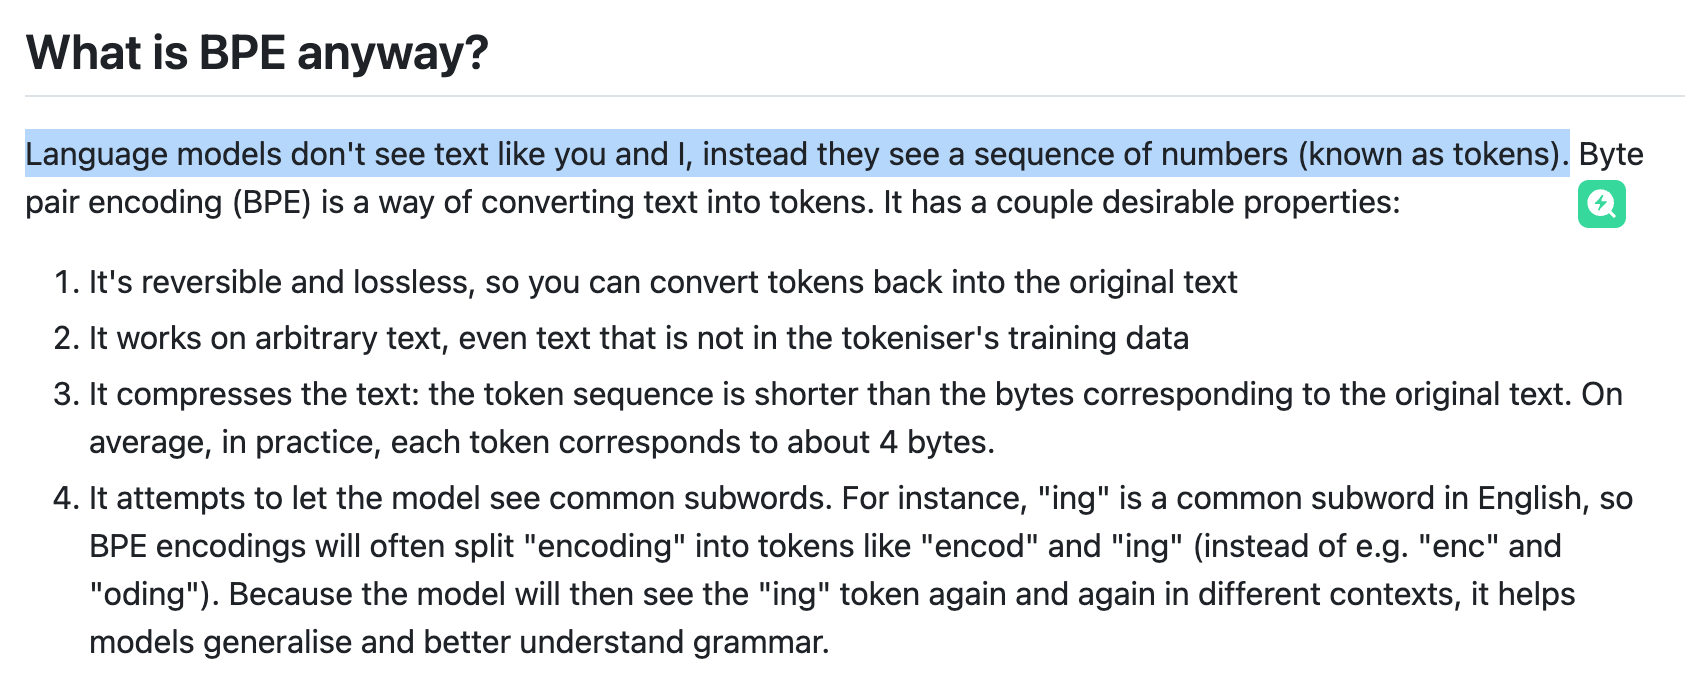

In [8]:
print([ord(x) for x in "Hello world, we are Gmarket. 🎉"])

[72, 101, 108, 108, 111, 32, 119, 111, 114, 108, 100, 44, 32, 119, 101, 32, 97, 114, 101, 32, 71, 109, 97, 114, 107, 101, 116, 46, 32, 127881]



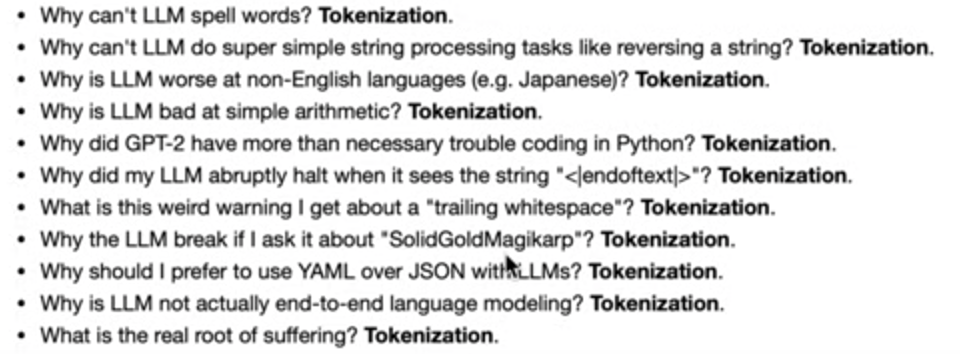

In [2]:
# !pip install -q --upgrade torch
import torch

# !pip install -q --upgrade tiktoken
import tiktoken # OpenAI의 inference용 Tokenizer입니다.

model_name = "gpt2"
enc = tiktoken.get_encoding(model_name)
print(f"{model_name}의 token 길이는 {enc.n_vocab:,.0f}개 입니다.") # gpt2의 token 길이는 50,257개

text_en = "Hello world, we are Gmarket. 🎉"
print(f"{text_en} -> {enc.encode(text_en)}")

text_ko = "안녕하세요, 우리는 Gmarket입니다. 🎉"
print(f"{text_ko} -> {enc.encode(text_ko)}")

gpt2의 token 길이는 50,257개 입니다.
Hello world, we are Gmarket. 🎉 -> [15496, 995, 11, 356, 389, 402, 10728, 13, 12520, 236, 231]
안녕하세요, 우리는 Gmarket입니다. 🎉 -> [168, 243, 230, 167, 227, 243, 47991, 246, 168, 226, 116, 168, 248, 242, 11, 23821, 248, 108, 167, 99, 105, 167, 232, 242, 402, 10728, 168, 252, 227, 46695, 230, 46695, 97, 13, 12520, 236, 231]


In [3]:
model_name = "gpt-4"

enc = tiktoken.encoding_for_model(model_name)
print(f"{model_name}의 token 길이는 {enc.n_vocab:,.0f}개 입니다.") # gpt4의 token 길이는 100,277개

text_en = "Hello world, we are Gmarket. 🎉"
print(f"{text_en} -> {enc.encode(text_en)}")

text_ko = "안녕하세요, 우리는 Gmarket입니다. 🎉"
print(f"{text_ko} -> {enc.encode(text_ko)}")

gpt-4의 token 길이는 100,277개 입니다.
Hello world, we are Gmarket. 🎉 -> [9906, 1917, 11, 584, 527, 480, 19859, 13, 11410, 236, 231]
안녕하세요, 우리는 Gmarket입니다. 🎉 -> [31495, 230, 75265, 243, 92245, 11, 66822, 108, 29102, 16969, 480, 19859, 80052, 13, 11410, 236, 231]


In [4]:
model_name = "gpt-4o"

enc = tiktoken.encoding_for_model(model_name)
print(f"{model_name}의 token 길이는 {enc.n_vocab:,.0f}개 입니다.") # gpt4의 token 길이는 100,277개

text_en = "Hello world, we are Gmarket. 🎉"
print(f"{text_en} -> {enc.encode(text_en)}")

text_ko = "안녕하세요, 우리는 Gmarket입니다. 🎉"
print(f"{text_ko} -> {enc.encode(text_ko)}")

gpt-4o의 token 길이는 200,019개 입니다.
Hello world, we are Gmarket. 🎉 -> [13225, 2375, 11, 581, 553, 499, 27236, 13, 139786, 231]
안녕하세요, 우리는 Gmarket입니다. 🎉 -> [14307, 171731, 11, 129416, 499, 27236, 27001, 13, 139786, 231]


### ==> gpt모델 업그레이드와 함께, tokenizer의 vocab_size가 커진 것을 알 수 있습니다. (5만개 -> 10만개 -> 20만개)

### ==> 이에 따라, 한글(뿐만 아니라 🎉 이모지)과 같은 비영어권 유니코드에 대해서도 BPE Merge가 커버하는 범위가 더 넓어졌음을 알 수 있고, 이는 다국어에 대해서도 영어와 유사한 토큰당 비용 (+성능)에 도달하게 하는 요인 중 하나가 될 것으로 생각됩니다.

In [5]:
### transformers는 HuggingFace에서 제공하는 오픈소스모델을 위한 라이브러리입니다.
### https://huggingface.co/openai-community/gpt2

from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model and tokenizer 
model_name = "gpt2"
model = GPT2LMHeadModel.from_pretrained(model_name)
tokenizer = GPT2Tokenizer.from_pretrained(model_name)

# Encode text and get model's predictions
input_text = "Hello world, we are Gmarket."
input_tokens = tokenizer.encode(input_text, return_tensors="pt")
print("\n=====")
print(f"input text : {input_text}")
print(f"input tokens : {input_tokens}")

# Perform inference
output = model.generate(input_tokens, max_length=50, do_sample=True, top_k=50, repetition_penalty=1.5, temperature=0.5)
print("\n=====")
print(f"output tokens : {output[0]}")

# Decode output back to text
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)
print(f"Generated Text: {generated_text}")


/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(



=====
input text : Hello world, we are Gmarket.
input tokens : tensor([[15496,   995,    11,   356,   389,   402, 10728,    13]])


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.



=====
output tokens : tensor([15496,   995,    11,   356,   389,   402, 10728,    13,   198,    40,
          716,   262, 13172,   286,   428,  3052,   290,   314,   481,   787,
          345,  3772,   351,   790,  2443,     0, 50256])
Generated Text: Hello world, we are Gmarket.
I am the creator of this website and I will make you happy with every page!


In [6]:
import torch
from transformers import GPT2Tokenizer, GPT2Model

# Load pre-trained GPT-2 model and tokenizer
model_name = "gpt2"
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2Model.from_pretrained(model_name)

# Set the model to evaluation mode (we don't need gradients)
model.eval()

# Encode the input text into token IDs
text = "Hello world, we are Gmarket."
input_ids = tokenizer.encode(text, return_tensors="pt")

# Access the token embeddings directly from the model's embedding layer
with torch.no_grad():
    token_embeddings = model.wte(input_ids)  # wte is the token embedding layer in GPT-2

# Get the tokens themselves for reference
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# Print tokens and their corresponding embeddings
for token, embedding in zip(tokens, token_embeddings.squeeze(0)):
    print(f"Token: {token}\nEmbedding: {embedding[:10]}... (showing first 10 dimensions)\n")


###########
### 아래와 같은 방식도 가능하지만, 위와 같이 wte layer를 추출하는 것이 보다 명확해보임.

# import torch
# from transformers import GPT2Tokenizer, GPT2Model

# # Load pre-trained GPT-2 model and tokenizer
# model_name = "gpt2"
# tokenizer = GPT2Tokenizer.from_pretrained(model_name)
# model = GPT2Model.from_pretrained(model_name)

# # Set the model to evaluation mode
# model.eval()

# # Encode text to get token IDs
# text = "Hello world, we are Gmarket."
# input_ids = tokenizer.encode(text, return_tensors="pt")

# # Extract token embeddings from the model
# with torch.no_grad():
#     outputs = model(input_ids)
#     last_hidden_states = outputs.last_hidden_state  # Shape: (batch_size, sequence_length, hidden_size)
# # Get the embeddings of each token (batch_size=1, so we squeeze it)
# token_embeddings = last_hidden_states.squeeze(0)  # Shape: (sequence_length, hidden_size)

# # Get the tokens themselves for reference
# tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

# # Print tokens and their corresponding embeddings
# for token, embedding in zip(tokens, token_embeddings):
#     print(f"Token: {token}\nEmbedding: {embedding[:5]}...\n")  # Print the first 5 dimensions of the embedding

/Users/kyunghokim/.pyenv/versions/3.11.5/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Token: Hello
Embedding: tensor([-0.0687, -0.1327,  0.0112, -0.1467, -0.1842, -0.0358, -0.2173, -0.1713,
        -0.0104, -0.0142])... (showing first 10 dimensions)

Token: Ġworld
Embedding: tensor([-0.1488,  0.1519,  0.0056, -0.1144, -0.0265, -0.0123, -0.3335, -0.0050,
         0.0539, -0.0143])... (showing first 10 dimensions)

Token: ,
Embedding: tensor([ 0.0115, -0.0029,  0.0323,  0.0552,  0.0524, -0.0604, -0.2400, -0.0173,
         0.0388,  0.0403])... (showing first 10 dimensions)

Token: Ġwe
Embedding: tensor([-0.0390,  0.0047,  0.0623,  0.1045,  0.0506,  0.0702, -0.2764, -0.0321,
         0.0844, -0.0334])... (showing first 10 dimensions)

Token: Ġare
Embedding: tensor([ 0.0756,  0.0559,  0.0481,  0.0515, -0.0263,  0.0642, -0.3115, -0.1557,
         0.0738,  0.0436])... (showing first 10 dimensions)

Token: ĠG
Embedding: tensor([-0.0295, -0.1305,  0.0753,  0.0205,  0.1421,  0.0251, -0.2251, -0.1604,
        -0.0283, -0.0624])... (showing first 10 dimensions)

Token: market
Embed

### “tokenizer/LLM diagram: it is a completely separate stage”

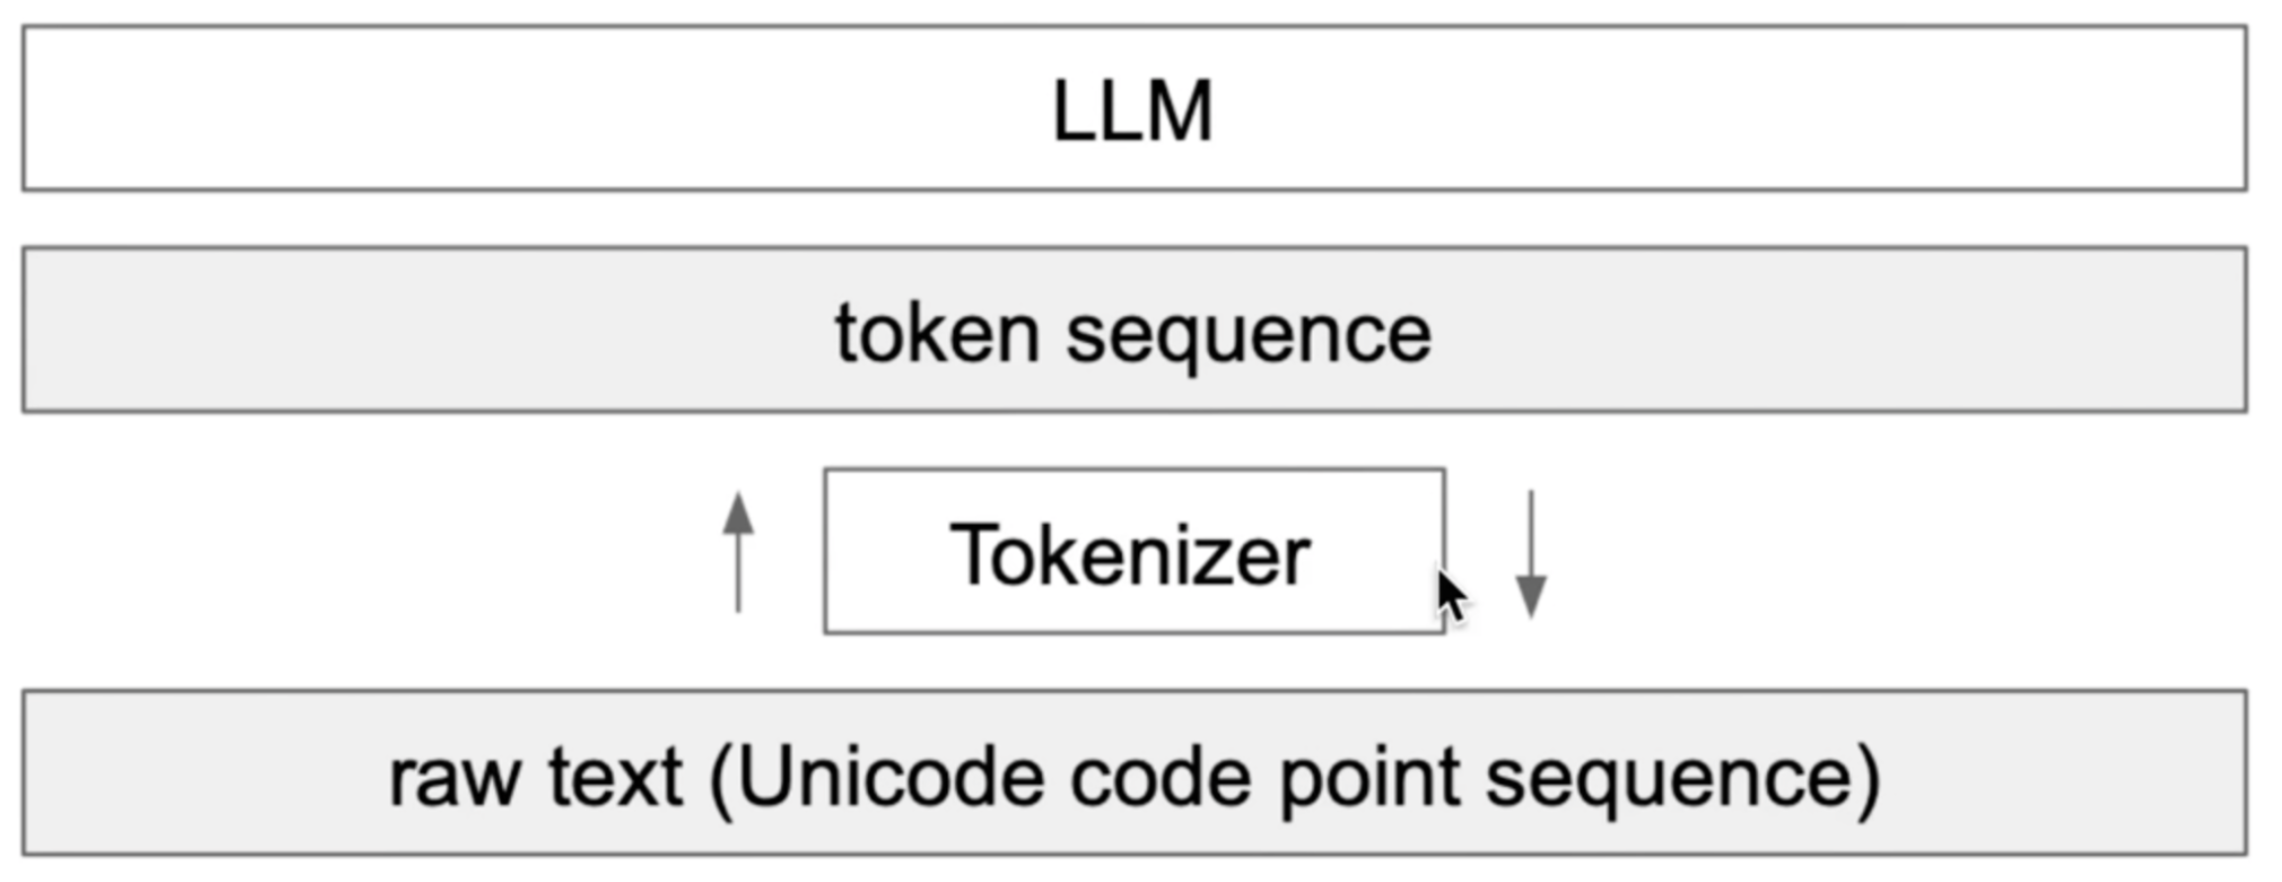

### ==> 이를 통해, Language Model들은 우리가 시각을 통해 문자를 보는 것처럼 보지 않고, token단위로 인코딩된 정보를 전달받는다는 것을 확인할 수 있었습니다. (폰트의 아름다움을 모르다니...)
#### 따라서, 아무리 Parameter가 많은 모델일지라도, character level 문제에 있어서는 미숙한 모습을 보이는 것은 당연하다고 할 수 있겠습니다.
#### 나아가, 이것이 이미지 생성에서 텍스트 표현에 미숙한 원인으로 판단됩니다.

In [7]:
# https://huggingface.co/EleutherAI/pythia-410m 모델

from transformers import AutoTokenizer, AutoModelForCausalLM

tokenizer = AutoTokenizer.from_pretrained("EleutherAI/pythia-410m")
model = AutoModelForCausalLM.from_pretrained("EleutherAI/pythia-410m") 

inputs = tokenizer("Hello world, we are Gmarket.", return_tensors="pt")
print(f"input token : {inputs}")
tokens = model.generate(**inputs, max_length=50)
print(f"output token : {tokens[0]}")
tokenizer.decode(tokens[0])


Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


input token : {'input_ids': tensor([[12092,  1533,    13,   359,   403,   443, 16532,    15]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}
output token : tensor([12092,  1533,    13,   359,   403,   443, 16532,    15,   681,    15,
          187,   187,  1231,   403,   247,  4156, 27769,   323,   253,  6323,
          285,  6459,   275,  6109,   285,  4384,  4893,    15,   844,   403,
          247,  2285,   273, 12259,    13, 22507,    13,   285,  1616,  2521,
          665,   403, 22500,   670,  3652,   253,  1682,  6109,   285,  4384])


'Hello world, we are Gmarket.com.\n\nWe are a global marketplace for the latest and greatest in mobile and web applications. We are a team of developers, designers, and marketers who are passionate about building the best mobile and web'